In [1]:
import numpy as np
import cv2
%matplotlib nbagg
from skimage import io
from skimage.color import rgb2gray

In [2]:
import numpy as np
from numpy.random import rand
from numpy import uint8, float32, float64, log, pi, sin, cos, abs, sqrt

import matplotlib.pyplot as plt
%matplotlib inline
plt.gray();
from matplotlib.pyplot import imshow

from skimage.io import imread, imsave
from skimage.color import rgb2gray, rgb2hsv
from skimage.transform import rotate, resize

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [4]:
class mouseParam:
    def __init__(self, input_img_name):
        #マウス入力用のパラメータ
        self.mouseEvent = {"x":None, "y":None, "event":None, "flags":None}
        #マウス入力の設定
        cv2.setMouseCallback(input_img_name, self.__CallBackFunc, None)
    
    #コールバック関数
    def __CallBackFunc(self, eventType, x, y, flags, userdata):
        
        self.mouseEvent["x"] = x
        self.mouseEvent["y"] = y
        self.mouseEvent["event"] = eventType    
        self.mouseEvent["flags"] = flags    

    #マウス入力用のパラメータを返すための関数
    def getData(self):
        return self.mouseEvent
    
    #マウスイベントを返す関数
    def getEvent(self):
        return self.mouseEvent["event"]                

    #マウスフラグを返す関数
    def getFlags(self):
        return self.mouseEvent["flags"]                

    #xの座標を返す関数
    def getX(self):
        return self.mouseEvent["x"]  

    #yの座標を返す関数
    def getY(self):
        return self.mouseEvent["y"]  

    #xとyの座標を返す関数
    def getPos(self):
        return (self.mouseEvent["x"], self.mouseEvent["y"])

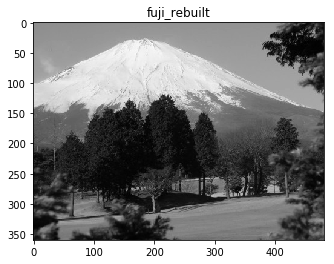

/Users/pirozhki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


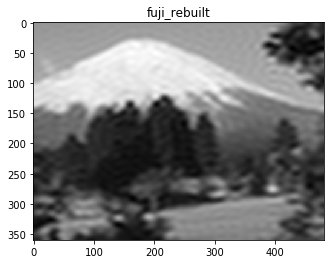

In [51]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys

fuji = cv2.imread('Images/fuji.jpg', 0)
fuji.astype(float)
fuji_F = dct(dct(fuji, axis=0), axis=1) ## 2D DCT of fuji

        
plt.imshow(fuji)
plt.title("fuji_origin")
plt.show()

H,W = fuji.shape

canvas = np.zeros((H,W))
for h in range(50):
    for w in range(50):
        a = np.zeros((H,W))
        a[h,w] = 1
        base = idct(idct(a, axis=0), axis=1) ## create dct bases
        canvas += fuji_F[h,w] * base ## accumulate
        if w%8 == 0:
            scipy.misc.imsave("fuji-%03d-%03d.png" % (h, w), canvas)
        
plt.imshow(canvas)
plt.title("fuji_rebuilt")
plt.show()

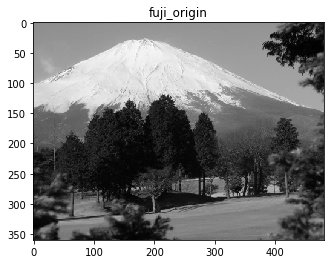

231 172
325 127
238 112
111 121
152 45
259 41
331 41
346 117
346 191
351 260
287 285
218 299
113 269
112 269
67 157
67 147
54 66
54 57
16 34
47 19
191 19
337 18
346 313
255 311
95 272
70 271
53 208
48 112
42 66
39 50
119 50
127 50
232 51
310 37
336 329
183 339
54 333
Finished


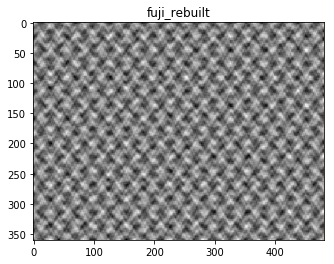

In [52]:
if __name__ == "__main__":
    #入力画像
    fuji = cv2.imread('Images/fuji.jpg', 0)
    fuji.astype(float)
    fuji_F = dct(dct(fuji, axis=0), axis=1) ## 2D DCT of fuji

    H,W = fuji.shape
    plt.imshow(fuji)
    plt.title("fuji_origin")
    plt.show()
    
    canvas = np.zeros((H,W))
    visited = np.zeros((H,W))
    #表示するWindow名
    window_name = "fft"
    
    #画像の表示
    cv2.imshow(window_name, fuji_F)
    
    #コールバックの設定
    mouseData = mouseParam(window_name)
    
    while 1:
        cv2.waitKey(20)
        #左クリック
        if mouseData.getEvent() == cv2.EVENT_LBUTTONDOWN:
            #print(mouseData.getPos())
            x, y = mouseData.getPos()
       
        if x < H and y < W and visited[x, y] == 0:
            print(x,y)
            a = np.zeros((H,W))
            a[x,y] = 1
            base = idct(idct(a, axis=0), axis=1) ## create dct bases
            canvas += fuji_F[x,y] * base ## accumulate
            visited[x, y] = 1
                
        #右クリックがあったら終了
        elif mouseData.getEvent() == cv2.EVENT_RBUTTONDOWN:
            break;
            
    cv2.destroyAllWindows()            
    print("Finished")
    
    plt.imshow(canvas)
    plt.title("fuji_rebuilt")
    plt.show()
